In [76]:
import pandas as pd
import os

In [77]:
import matplotlib

In [78]:
df = pd.read_csv("../csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv")

In [79]:
% matplotlib inline

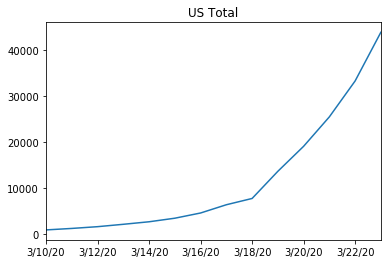

In [80]:
us_by_state.sum()[52:].plot(title="US Total")

In [81]:
import numpy as np
import matplotlib.pyplot as plt

FileNotFoundError: [Errno 2] No such file or directory: '../graphs_20200323/Afghanistan.png'

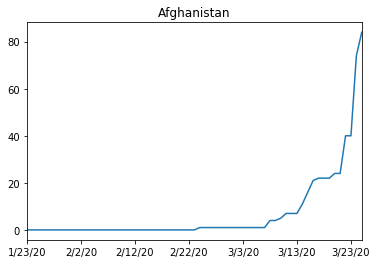

In [82]:
for state, country  in zip (df["Province/State"], df["Country/Region"] ):
    plt.clf()
    try:
        if np.isnan(state):
            dfcountry = df[df["Country/Region"] == country]
            dfcountry.iloc[0][5:].plot(title=country)
            plt.savefig("../graphs_20200323/"+country+ ".png")
            
    except TypeError:
        dfstate = df[df["Province/State"] == state]
        dfstate.iloc[0][5:].plot(title=state)       
        plt.savefig("../graphs_20200323/"+country + " "+ state + ".png")

In [83]:
import os
files = os.listdir("../csse_covid_19_data/csse_covid_19_daily_reports/")

In [84]:
files = [f for f in files if f[0] == '0' ]

In [85]:
files.sort()
dates = [d[:-4] for d in files]

In [86]:
dates

['01-22-2020',
 '01-23-2020',
 '01-24-2020',
 '01-25-2020',
 '01-26-2020',
 '01-27-2020',
 '01-28-2020',
 '01-29-2020',
 '01-30-2020',
 '01-31-2020',
 '02-01-2020',
 '02-02-2020',
 '02-03-2020',
 '02-04-2020',
 '02-05-2020',
 '02-06-2020',
 '02-07-2020',
 '02-08-2020',
 '02-09-2020',
 '02-10-2020',
 '02-11-2020',
 '02-12-2020',
 '02-13-2020',
 '02-14-2020',
 '02-15-2020',
 '02-16-2020',
 '02-17-2020',
 '02-18-2020',
 '02-19-2020',
 '02-20-2020',
 '02-21-2020',
 '02-22-2020',
 '02-23-2020',
 '02-24-2020',
 '02-25-2020',
 '02-26-2020',
 '02-27-2020',
 '02-28-2020',
 '02-29-2020',
 '03-01-2020',
 '03-02-2020',
 '03-03-2020',
 '03-04-2020',
 '03-05-2020',
 '03-06-2020',
 '03-07-2020',
 '03-08-2020',
 '03-09-2020',
 '03-10-2020',
 '03-11-2020',
 '03-12-2020',
 '03-13-2020',
 '03-14-2020',
 '03-15-2020',
 '03-16-2020',
 '03-17-2020',
 '03-18-2020',
 '03-19-2020',
 '03-20-2020',
 '03-21-2020',
 '03-22-2020',
 '03-23-2020',
 '03-24-2020',
 '03-25-2020']

In [87]:
dataframes = {}

for f,d in zip(files,dates):
    df = pd.read_csv("../csse_covid_19_data/csse_covid_19_daily_reports/"+ f)
    dataframes[d] = df

In [88]:
dataframes.keys()

dict_keys(['01-22-2020', '01-23-2020', '01-24-2020', '01-25-2020', '01-26-2020', '01-27-2020', '01-28-2020', '01-29-2020', '01-30-2020', '01-31-2020', '02-01-2020', '02-02-2020', '02-03-2020', '02-04-2020', '02-05-2020', '02-06-2020', '02-07-2020', '02-08-2020', '02-09-2020', '02-10-2020', '02-11-2020', '02-12-2020', '02-13-2020', '02-14-2020', '02-15-2020', '02-16-2020', '02-17-2020', '02-18-2020', '02-19-2020', '02-20-2020', '02-21-2020', '02-22-2020', '02-23-2020', '02-24-2020', '02-25-2020', '02-26-2020', '02-27-2020', '02-28-2020', '02-29-2020', '03-01-2020', '03-02-2020', '03-03-2020', '03-04-2020', '03-05-2020', '03-06-2020', '03-07-2020', '03-08-2020', '03-09-2020', '03-10-2020', '03-11-2020', '03-12-2020', '03-13-2020', '03-14-2020', '03-15-2020', '03-16-2020', '03-17-2020', '03-18-2020', '03-19-2020', '03-20-2020', '03-21-2020', '03-22-2020', '03-23-2020', '03-24-2020', '03-25-2020'])

In [89]:
from datetime import date, datetime, timedelta

In [90]:
today = datetime.strftime(date.today(),'%m-%d-%Y')
os.mkdir("../graphs_"+today)

In [91]:
if today not in dataframes.keys():
    yesterday = datetime.strftime(date.today() - timedelta(1),'%m-%d-%Y')

In [92]:
try:
    latest_data = dataframes[today]
except KeyError:
    latest_data = dataframes[yesterday]

In [93]:
states = set(latest_data["Province_State"].tolist())

In [95]:
try:
    states.remove(np.nan)
except KeyError:
    pass

KeyError: nan

In [97]:




latest_data.columns

Index(['FIPS', 'Admin2', 'Province_State', 'Country_Region', 'Last_Update',
       'Lat', 'Long_', 'Confirmed', 'Deaths', 'Recovered', 'Active',
       'Combined_Key'],
      dtype='object')

In [98]:
texas_2020_03_24 =  dataframes['03-23-2020'][dataframes['03-23-2020']["Province_State"] == "Texas"].Confirmed.sum()

In [99]:
texas_2020_03_24

758

In [100]:
countries = set(latest_data["Country_Region"].tolist())

In [103]:
try:
    countries.remove(np.nan)
except KeyError:
    pass


In [104]:
state_data = {}
for state in states:
    daily_confirmed_for_state = {}
    for date in dates:
        try:
            daily_confirmed = dataframes[date][dataframes[date]["Province_State"] == state].Confirmed.sum()
        except KeyError:
            daily_confirmed = dataframes[date][dataframes[date]["Province/State"] == state].Confirmed.sum()    
        daily_confirmed_for_state[date] = daily_confirmed
    state_data[state] = daily_confirmed_for_state

In [105]:
country_data = {}
for country in countries:
    daily_confirmed_for_country = {}
    for date in dates:
        try:
            daily_confirmed = dataframes[date][dataframes[date]["Country_Region"] == country].Confirmed.sum()
        except KeyError:
            daily_confirmed = dataframes[date][dataframes[date]["Country/Region"] == country].Confirmed.sum()    
        daily_confirmed_for_country[date] = daily_confirmed
    country_data[country] = daily_confirmed_for_country

In [121]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import datetime as dt
from pathlib import Path

In [123]:
os.makedirs("../graphs/graphs_"+ today + '/', exist_ok=True) 

In [124]:
def plot_figure(daily_totals, title):
    dates = list(daily_totals.keys())
    x = [dt.datetime.strptime(d,'%m-%d-%Y').date() for d in dates]
    y = []
    for d in daily_totals.values():
        try:
            y.append(int(d))
        except ValueError:
            y.append(0)
    #y = [ int(y) for y in daily_totals.values()]
    x, y = remove_zero_days(x,y,title)
    plt.suptitle(title)
    plt.figure(figsize=(30,10))
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m-%d-%Y'))
    plt.gca().xaxis.set_major_locator(mdates.DayLocator())
    #ax.yaxis.set_label_position("right")
    #ax.yaxis.tick_right()
    plt.plot(x, y)
    plt.gcf().autofmt_xdate()
    plt.savefig("../graphs/graphs_"+today + '/'+ title + ".png")
    plt.close()
 

In [128]:
def remove_zero_days(x,y,title):
    first_case = 0
    for value in y:
        if value < 10:
            first_case += 1
        else:
            break
    return x[first_case:], y[first_case:]
    
    

In [129]:
for country in country_data.keys():
    plot_figure(country_data[country], country)

In [130]:
for state in state_data.keys():
    plot_figure(state_data[state], state)

In [131]:
plot_figure(state_data["Texas"],"Texas")

In [120]:
today

'03-26-2020'